In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Importing Libraries

In [0]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

Reading File

In [0]:
train_data = pd.read_excel('/content/drive/My Drive/MITH Exam/train_data-1578037482430.xlsx', header=0, na_values='unknown', sep=',')
test_data = pd.read_excel('/content/drive/My Drive/MITH Exam/test_data-1578037501169.xlsx',header=0, na_values='unknown', sep=',')

In [4]:
print(train_data.shape)
print(test_data.shape)

train_data.head()

(7360, 21)
(1840, 20)


,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,secondary,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0


In [5]:
# What are the names of the columns?
print(list(train_data.columns))

['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth', 'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn']


In [6]:
train_data.isna().sum()

CustomerID                 0
CustomerName               0
yearofBirth                0
monthofBirth               0
dayofBirth                 0
yearofEntry                0
monthofEntry               0
dayofEntry                 0
Gender                     0
Location                   0
Education               1860
MaritalStatus              0
Occupation               781
Ownhouse                 191
CreditScore                0
AccountBalance             0
NumberOfProducts           0
IsCreditCardCustomer       0
ActiveMember               0
Salary                     0
Churn                      0
dtype: int64

In [7]:
test_data.isnull().sum()

CustomerID                0
CustomerName              0
yearofBirth               0
monthofBirth              0
dayofBirth                0
yearofEntry               0
monthofEntry              0
dayofEntry                0
Gender                    0
Location                  0
Education               481
MaritalStatus             0
Occupation              177
Ownhouse                 59
CreditScore               0
AccountBalance            0
NumberOfProducts          0
IsCreditCardCustomer      0
ActiveMember              0
Salary                    0
dtype: int64

Checking Null Values

In [8]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Education,1860,0.252717
Occupation,781,0.106114
Ownhouse,191,0.025951
Gender,0,0.000000
CustomerName,0,0.000000


It is found that 25% of Education rows are NA values

Checking the summary of Data

In [9]:
train_data.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
train_data.Churn.value_counts()

0    5868
1    1492
Name: Churn, dtype: int64

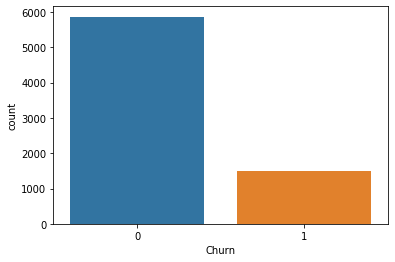

In [11]:
# Plot Distribution
sns.countplot(x='Churn',data=train_data)
plt.show()

The above plot shows the variation in Target Column

Checking the Datatypes of the train data

In [12]:
train_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

Summary of Categorical Variables

In [13]:
train_data.describe(include='object')

,CustomerID,CustomerName,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse
count,7360,7360,7360,7360,5500,7360,6579,7169
unique,7360,7360,2,3,3,3,6,2
top,C3277729,Name_2006884,Male,Location11,primary,single,admin.,no
freq,1,1,3994,3693,1864,2559,3207,3684


Checking the Education level proportion of bank customers

In [14]:
train_data.Education.value_counts()

primary      1864
secondary    1839
tertiary     1797
Name: Education, dtype: int64

Saving the Dataset in Train Original for having the original dataset.

In [0]:
train_original=train_data.copy() 
test_original=test_data.copy()

BoxPlot to Check Outliers

Text(0.5, 0.98, '')

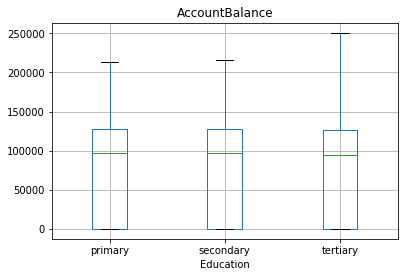

In [16]:
train_data.boxplot(column='AccountBalance', by = 'Education') 
plt.suptitle("")

Copying the CustomerID for submission purpose

In [0]:
id_value =test_data['CustomerID']

In [18]:
train_data.groupby('Education').mean()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
Education,,,,,,,,,,,,,
primary,1979.194742,6.543991,14.353541,2013.029506,6.488734,14.392704,653.013948,77050.054474,1.521996,0.728004,0.498927,99663.888895,0.194742
secondary,1978.607395,6.325177,14.887983,2012.986406,6.388254,14.500272,652.761827,76246.503616,1.518216,0.700924,0.510060,99834.501457,0.218597
tertiary,1979.442404,6.691708,14.678353,2012.961603,6.513634,14.370618,645.663884,75163.772677,1.534224,0.679466,0.529215,98332.797218,0.195326


# Dropping Columns

In [0]:
train_data.drop(["CustomerID","CustomerName","monthofBirth","dayofBirth","dayofEntry"], axis = 1, inplace= True)
test_data.drop(["CustomerID","CustomerName","monthofBirth","dayofBirth","dayofEntry"], axis = 1, inplace= True)

In [20]:
print(train_data.shape)
print(test_data.shape)

(7360, 16)
(1840, 15)


Creating New Column Age by subtracting 2018 with YearofBirth

In [0]:
train_data['Age'] = 2018-train_data['yearofBirth']

In [22]:
train_data.head()

,yearofBirth,yearofEntry,monthofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age
0,1980,2014,11,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,38
1,1986,2011,8,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,32
2,1999,2013,12,Male,Location13,secondary,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0,19
3,1969,2015,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,49
4,1993,2012,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,25


In [0]:
test_data['Age'] = 2018-test_data['yearofBirth']

Creating Yrsofassociation of customer with the bank

In [0]:
train_data["yrsofassociation"] = 2019-train_data['yearofEntry']

In [0]:
test_data["yrsofassociation"] = 2019-test_data['yearofEntry']

In [26]:
train_data.head()

,yearofBirth,yearofEntry,monthofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,yrsofassociation
0,1980,2014,11,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,38,5
1,1986,2011,8,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,32,8
2,1999,2013,12,Male,Location13,secondary,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0,19,6
3,1969,2015,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,49,4
4,1993,2012,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,25,7


In [27]:
test_data.head()

,yearofBirth,yearofEntry,monthofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,yrsofassociation
0,1972,2015,12,Male,Location13,NaN,single,management,yes,624,0.00,2,1,1,62825.03,46,4
1,1990,2016,11,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38,28,3
2,1966,2011,10,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82,52,8
3,1983,2016,7,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97,35,3
4,1983,2009,5,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70,35,10


In [0]:
train_data.drop(["monthofEntry"], axis = 1, inplace= True)
test_data.drop(["monthofEntry"], axis = 1, inplace= True)

In [29]:
print(train_data.shape)
print(test_data.shape)

(7360, 17)
(1840, 16)


In [0]:
train_data.drop(["yearofBirth","yearofEntry"], axis = 1, inplace= True)
test_data.drop(["yearofBirth","yearofEntry"], axis = 1, inplace= True)

In [31]:
print(train_data.shape)
print(test_data.shape)

(7360, 15)
(1840, 14)


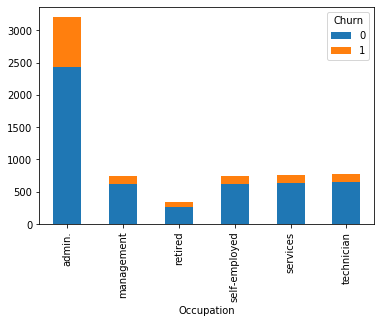

In [32]:
Employment=pd.crosstab(train_data['Occupation'],train_data['Churn']) 
Employment.plot.bar(stacked =True)
plt.show()

In [33]:
train_data.Occupation.value_counts()

admin.           3207
technician        770
services          762
management        749
self-employed     748
retired           343
Name: Occupation, dtype: int64

In [34]:
train_data.groupby('Occupation').mean()

,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,yrsofassociation
Occupation,,,,,,,,,
admin.,650.516059,74840.869969,1.542251,0.704085,0.494855,100007.305525,0.242283,37.763954,5.980044
management,649.263017,76106.936155,1.515354,0.702270,0.502003,98709.202603,0.165554,37.485981,5.989319
retired,653.734694,74261.142216,1.507289,0.693878,0.816327,96608.470641,0.241983,67.635569,5.950437
self-employed,650.259358,74153.061203,1.504011,0.715241,0.520053,100770.023115,0.165775,37.192513,6.066845
services,654.715223,81612.304094,1.535433,0.699475,0.461942,100889.496614,0.171916,37.073491,6.072178
technician,649.462338,80977.663442,1.475325,0.689610,0.489610,99258.596221,0.149351,37.142857,6.003896


In [35]:
train_data.Gender.value_counts()

Male      3994
Female    3366
Name: Gender, dtype: int64

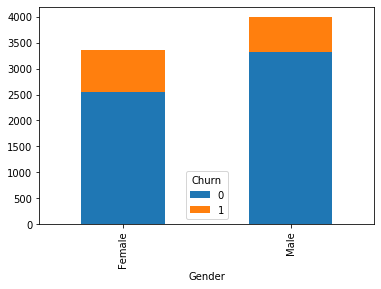

In [36]:
Gender=pd.crosstab(train_data['Gender'],train_data['Churn']) 
Gender.plot.bar(stacked =True)
plt.show()

In [37]:
train_data.MaritalStatus.value_counts(normalize=True)

single      0.347690
married     0.340082
divorced    0.312228
Name: MaritalStatus, dtype: float64

Churn             0    1
MaritalStatus           
divorced       1819  479
married        2024  479
single         2025  534


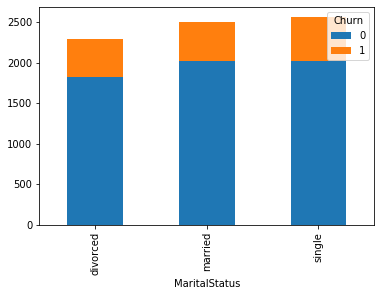

In [38]:
Married=pd.crosstab(train_data['MaritalStatus'],train_data['Churn']) 
print(Married)
Married.plot.bar(stacked =True)
plt.show()


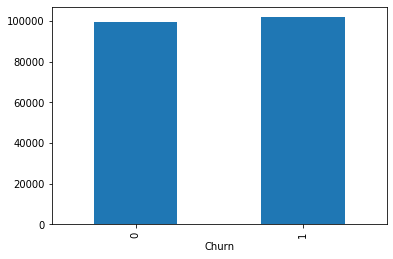

In [39]:
train_data.groupby('Churn')['Salary'].mean().plot.bar()

Checking whether there is any difference in Churn with Salary

Checking Outliers

Text(0.5, 0.98, '')

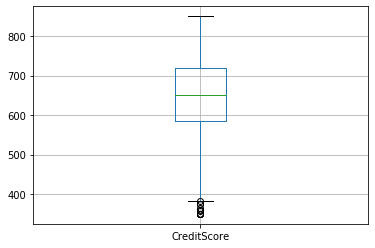

In [40]:
train_data.boxplot('CreditScore') 
plt.suptitle("")

Finding ZScore to remove outliers

In [41]:
from scipy import stats
import numpy as np
zscore = np.abs(stats.zscore(train_data["CreditScore"]))
print(zscore)

[0.67537648 0.85413918 0.91307148 ... 1.56722419 0.35500496 1.25411214]


In [0]:
z_new = [] 
def remove_outlier(data):
    for i in data.columns:
        z = np.abs(stats.zscore(data[i]))
        z_new = z_new.append(z)

In [43]:
threshold = 2.58
print(np.where(zscore >2.58 ))

(array([  38, 1482, 1913, 2934, 3626, 4204, 5055, 5212, 5521, 5584, 6806,
       6982]),)


In [0]:
creditscore_zscores = list(np.where(zscore > 2.58))

Selecting Data without Outliers

In [0]:
train_datawithoutoutliers = train_data[(zscore < 2.58)]

In [46]:
train_datawithoutoutliers.shape

(7348, 15)

In [0]:
train_datanew = train_datawithoutoutliers

In [48]:
train_datanew.dtypes

Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
Age                       int64
yrsofassociation          int64
dtype: object

Converting Object into Columns

In [0]:
for col in ['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 
            'Ownhouse', 'IsCreditCardCustomer', 'ActiveMember', 'Churn']:
      train_datanew[col] = train_datanew[col].astype('category')

In [0]:
for col in ['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 
            'Ownhouse', 'IsCreditCardCustomer', 'ActiveMember']:
      test_data[col] = test_data[col].astype('category')

In [51]:
train_datanew.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
Age                        int64
yrsofassociation           int64
dtype: object

In [0]:
cat_attr = list(train_datanew.select_dtypes("category").columns)
num_attr = list(train_datanew.columns.difference(cat_attr))


In [53]:
cat_attr

['Gender',
 'Location',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Ownhouse',
 'IsCreditCardCustomer',
 'ActiveMember',
 'Churn']

In [54]:
cat_attr.pop()

'Churn'

Pipeline and Model Building

In [0]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])



categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value="missing_value")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

Model1 - Logistic Regression

In [0]:
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [0]:
X=train_datanew.drop("Churn",axis=1)
y=pd.DataFrame(train_datanew['Churn'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123) 

In [59]:
X_train.head(1)

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,yrsofassociation
4515,Female,Location13,tertiary,divorced,retired,no,580,0.0,2,0,1,103182.46,65,2


In [60]:
logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [0]:
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix

In [63]:
print(accuracy_score(y_test,test_pred))
print(classification_report(y_test,test_pred))

0.8272108843537415
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1760
           1       0.70      0.26      0.37       445

    accuracy                           0.83      2205
   macro avg       0.77      0.61      0.64      2205
weighted avg       0.81      0.83      0.79      2205



In [64]:
print(confusion_matrix(y_test, test_pred))

[[1710   50]
 [ 331  114]]


In [65]:
print(accuracy_score(y_test,test_pred))
print(precision_score(y_test,test_pred))
print(recall_score(y_test,test_pred))

0.8272108843537415
0.6951219512195121
0.25617977528089886


In [0]:
from sklearn.metrics import f1_score

In [67]:
print(f1_score(y_test,test_pred))

0.37438423645320196


In [0]:
prob=logreg.predict_proba(X_test)
prob = prob[:,1]

ROC-AUC Curve

In [0]:
from sklearn.metrics import auc,roc_curve

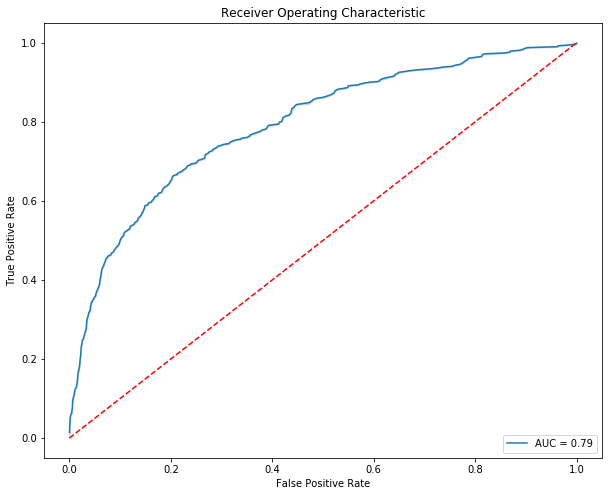

In [70]:
fpr,tpr,_ = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4108
           1       0.67      0.26      0.37      1035

    accuracy                           0.83      5143
   macro avg       0.75      0.61      0.64      5143
weighted avg       0.80      0.83      0.79      5143



Decision Tree

In [72]:
from sklearn import tree
clf_dtree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', tree.DecisionTreeClassifier())])
param_grid = {"classifier__criterion": ["gini", "entropy"],
              "classifier__min_samples_split": [2, 10,15,20],
              "classifier__max_depth": [None, 2, 5, 10],
              "classifier__min_samples_leaf": [1, 5, 10],
              "classifier__max_leaf_nodes": [None, 5, 10, 20],
              }
clf_dtreeRandom =  RandomizedSearchCV(clf_dtree,param_distributions=param_grid,cv=10)
clf_dtreeRandom.fit(X=X_train, y=y_train)   

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                    

In [0]:
train_preddtr = clf_dtreeRandom.predict(X_train)
test_preddtr = clf_dtreeRandom.predict(X_test)

In [74]:
print(classification_report(y_test,test_preddtr))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1760
           1       0.80      0.40      0.53       445

    accuracy                           0.86      2205
   macro avg       0.83      0.69      0.73      2205
weighted avg       0.85      0.86      0.84      2205



Decision Tree Classifier

In [76]:
clf_dgtree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', tree.DecisionTreeClassifier())])
rfc_param_grid = {"classifier__criterion": ["gini", "entropy"],
              "classifier__min_samples_split": [2, 10,15,20],
              "classifier__max_depth": [None, 2, 5, 10],
              "classifier__min_samples_leaf": [1, 5, 10],
              "classifier__max_leaf_nodes": [None, 5, 10, 20],
              }
clf_dtreegrid =  GridSearchCV(clf_dgtree,param_grid=rfc_param_grid,cv=10)
clf_dtreegrid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                   

In [0]:
train_preddtg = clf_dtreegrid.predict(X_train)
test_preddtg = clf_dtreegrid.predict(X_test)

In [79]:
print(classification_report(y_test,test_preddtg))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1760
           1       0.80      0.40      0.53       445

    accuracy                           0.86      2205
   macro avg       0.83      0.69      0.73      2205
weighted avg       0.85      0.86      0.84      2205



In [0]:
prob=clf_dtreegrid.predict_proba(X_test)
prob = prob[:,1]

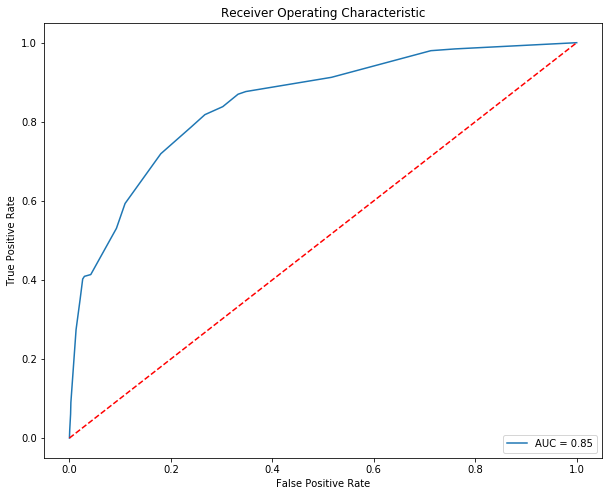

In [81]:
fpr,tpr,_ = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
best_grid_model = clf_dtreegrid.best_estimator_
print (clf_dtreegrid.best_score_, clf_dtreegrid.best_params_) 

0.8524207660898309 {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_leaf_nodes': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [0]:
orgtest_predict=best_grid_model.predict(test_data)

In [82]:
print(classification_report(y_train,train_preddtr))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4108
           1       0.82      0.38      0.52      1035

    accuracy                           0.86      5143
   macro avg       0.84      0.68      0.72      5143
weighted avg       0.85      0.86      0.84      5143



In [0]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict })
output.to_csv('submissiondtg.csv', index=False)

RandomForest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
%%time
clf_rfcgrid = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rfc_param_grid = {"classifier__n_estimators" : [9, 18, 27, 36, 45, 54, 63,100],
                  "classifier__max_depth" : [2,3,5,7,10],
                  "classifier__min_samples_leaf" : [2, 4]}

rfc_grid = GridSearchCV(clf_rfcgrid, param_grid=rfc_param_grid, cv=5)
rfc_grid.fit(X_train,y_train)

CPU times: user 1min 17s, sys: 156 ms, total: 1min 17s
Wall time: 1min 18s


In [0]:
train_predrfc = rfc_grid.predict(X_train)
test_predrfc = rfc_grid.predict(X_test)

In [92]:
print(classification_report(y_test,test_predrfc))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1760
           1       0.76      0.35      0.48       445

    accuracy                           0.85      2205
   macro avg       0.81      0.66      0.70      2205
weighted avg       0.84      0.85      0.82      2205



In [93]:
print(classification_report(y_train,train_predrfc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4108
           1       0.96      0.49      0.65      1035

    accuracy                           0.89      5143
   macro avg       0.92      0.74      0.79      5143
weighted avg       0.90      0.89      0.88      5143



In [0]:
orgtest_predict1=rfc_grid.predict(test_data)

In [0]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict1 })
output.to_csv('submissionrfc.csv', index=False)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier


XGBoost

In [98]:
%%time
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
clf_param_grid = {'classifier__colsample_bytree': np.linspace(0.3, 0.9, 2),
                  'classifier__n_estimators':[300],
                  'classifier__max_depth': [6,8,10, 15]}
clf_xgb = GridSearchCV(xgb, param_grid=clf_param_grid, cv=5)                 

clf_xgb.fit(X_train,y_train)

CPU times: user 1min 29s, sys: 555 ms, total: 1min 29s
Wall time: 1min 30s


In [0]:
train_predxgb = clf_xgb.predict(X_train)
test_predxgb = clf_xgb.predict(X_test)

In [100]:
print(classification_report(y_test,test_predxgb))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1760
           1       0.72      0.44      0.55       445

    accuracy                           0.85      2205
   macro avg       0.80      0.70      0.73      2205
weighted avg       0.84      0.85      0.84      2205



In [0]:
prob=clf_xgb.predict_proba(X_test)
prob = prob[:,1]

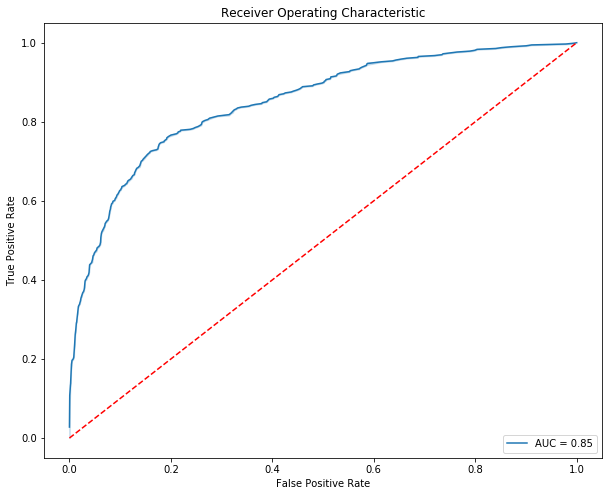

In [140]:
fpr,tpr,_ = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
print(classification_report(y_train,train_predxgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4108
           1       0.98      0.78      0.87      1035

    accuracy                           0.95      5143
   macro avg       0.97      0.89      0.92      5143
weighted avg       0.95      0.95      0.95      5143



In [0]:
orgtest_predict2=clf_xgb.predict(test_data)

In [0]:
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict2 })
output.to_csv('submissionxgb.csv', index=False)

Gradient Boosting

In [105]:
%%time
GBC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier())])
clf_param_grid = {"classifier__n_estimators" : [100,150],
                  "classifier__max_depth" : [None,5,6],
                  "classifier__learning_rate" : [0.1,0.3, 0.5,0.6]}
clf_randomgrid = RandomizedSearchCV(GBC, param_distributions=clf_param_grid, cv=5)                 

clf_randomgrid.fit(X_train,y_train)

CPU times: user 1min 49s, sys: 50.9 ms, total: 1min 49s
Wall time: 1min 49s


In [0]:
train_predgb = clf_randomgrid.predict(X_train)
test_predgb = clf_randomgrid.predict(X_test)

In [107]:
print(classification_report(y_test,test_predgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1760
           1       0.73      0.47      0.57       445

    accuracy                           0.86      2205
   macro avg       0.80      0.71      0.74      2205
weighted avg       0.85      0.86      0.84      2205



In [108]:
print(classification_report(y_train,train_predgb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4108
           1       0.93      0.61      0.74      1035

    accuracy                           0.91      5143
   macro avg       0.92      0.80      0.84      5143
weighted avg       0.91      0.91      0.91      5143



In [109]:
best_grid_model1 = clf_randomgrid.best_estimator_
print (clf_randomgrid.best_score_, clf_randomgrid.best_params_) 

0.8553373517402294 {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}


In [0]:
test_predgb1 = best_grid_model1.predict(X_test)

In [111]:
print(classification_report(y_test,test_predgb1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1760
           1       0.73      0.47      0.57       445

    accuracy                           0.86      2205
   macro avg       0.80      0.71      0.74      2205
weighted avg       0.85      0.86      0.84      2205



In [0]:
orgtest_predict3=best_grid_model1.predict(test_data)

In [0]:
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict3 })
output.to_csv('submissiongb.csv', index=False)

AdaBoost Model

In [114]:
%%time
Adaboost = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier())])
clf_param_grid = { 
                  "classifier__n_estimators" : [100,150,200],
                  "classifier__learning_rate" : [0.1,0.5,0.9]}
clf_gridada = GridSearchCV(Adaboost, param_grid=clf_param_grid, cv=5)                 

clf_gridada.fit(X_train,y_train)

CPU times: user 37.1 s, sys: 163 ms, total: 37.2 s
Wall time: 37.3 s


In [0]:
train_predada = clf_gridada.predict(X_train)
test_predada = clf_gridada.predict(X_test)

In [117]:
print(classification_report(y_test,test_predada))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1760
           1       0.73      0.46      0.57       445

    accuracy                           0.86      2205
   macro avg       0.80      0.71      0.74      2205
weighted avg       0.85      0.86      0.84      2205



In [118]:
print(classification_report(y_train,train_predada))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      4108
           1       0.76      0.44      0.56      1035

    accuracy                           0.86      5143
   macro avg       0.81      0.70      0.74      5143
weighted avg       0.85      0.86      0.84      5143



In [0]:
orgtest_predict4=clf_gridada.predict(test_data)

In [0]:
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict4 })
output.to_csv('submissionada.csv', index=False)

Tuning Parameters for XGBoost

In [128]:
%%time
xgb1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
clf_param_grid = {
                  'classifier__n_estimators':[100,150,300],
                  "classifier__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  "classifier__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                  "classifier__colsample_bytree" : [ 0.3, 0.4, 0.5,0.7],
                  'classifier__max_depth': [4,6,8,10, 15]}
clf_xgb1 = RandomizedSearchCV(xgb1, param_distributions=clf_param_grid, cv=5)                 

clf_xgb1.fit(X_train,y_train)

CPU times: user 1min 11s, sys: 313 ms, total: 1min 11s
Wall time: 1min 11s


In [0]:
train_predxgb1 = clf_xgb1.predict(X_train)
test_predxgb1 = clf_xgb1.predict(X_test)

In [130]:
print(classification_report(y_test,test_predxgb1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1760
           1       0.70      0.44      0.54       445

    accuracy                           0.85      2205
   macro avg       0.79      0.70      0.73      2205
weighted avg       0.84      0.85      0.84      2205



In [131]:
print(classification_report(y_train,train_predxgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4108
           1       1.00      1.00      1.00      1035

    accuracy                           1.00      5143
   macro avg       1.00      1.00      1.00      5143
weighted avg       1.00      1.00      1.00      5143



In [132]:
best_grid_model2 = clf_xgb1.best_estimator_
print (clf_xgb1.best_score_, clf_xgb1.best_params_) 

0.8586428154773479 {'classifier__n_estimators': 300, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.4, 'classifier__colsample_bytree': 0.7}


In [0]:
test_predxgb2 = best_grid_model2.predict(X_test)

In [134]:
print(classification_report(y_test,test_predxgb2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1760
           1       0.70      0.44      0.54       445

    accuracy                           0.85      2205
   macro avg       0.79      0.70      0.73      2205
weighted avg       0.84      0.85      0.84      2205



In [0]:
orgtest_predict5 = best_grid_model2.predict(test_data)

In [0]:
output = pd.DataFrame({ 'CustomerId' : id_value, 'Churn': orgtest_predict5 })
output.to_csv('submissionxgb2.csv', index=False)